In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 0: Reading the data

## Please find the data (test_DataScience.xlsx) and take it as the input ( as data frame ).


In [2]:
#Reading data as a dataframe

dataframe=pd.read_excel('test_DataScience.xlsx')
dataframe.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


## Print all the column names and the data types in each column.

In [3]:
#Printing each column with its datatype
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   int64  
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             1081 non-null   float64
 7   Level 2             1081 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 168.9+ KB


## Print the cities of India from which the page was accessed.


In [4]:
# Various locations from which the page was accessed

print(dataframe['Place_in_India'].unique())
     

['Bengaluru' 'Hyderabad' 'Dehradun' 'Indore' 'Pune']


## Write a brief paragraph about what you think about this dataset along the lines of :
### 1. which geo-location this dataset belongs to? 
 Ans. This dataset belongs to the Indian region because of the Place_in_India column.


### 2. Given that this dataset is for a website like Flipkart, what could be the possible definitions of the columns Level 1, 2, 3, 4 in the given dataset?
Ans. The levels could be points/scores associated to each customer.


# Part 1: Data cleaning


## Write a function called data_cleaning() which, when called, would perform the following activity:
1. Create a new column, called ‘Month_Year’, using lambda function. The new column should be at the 3rd position from the start in the given dataset & its values should be : ’01-01-2020’ for January, 2020 and ’01-02-2020’ for February 2020 and so on.  (snippet added) 
2. Replaces the null values with the average of the respective column in the data.
3. In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on.
4. In column ‘E’ Replace “Came_From_LinkedIn” with “LinkedIn” and “Landed_Directly” with “Direct_traffic” .


In [5]:
from datetime import datetime as dt

In [6]:
# Function for cleaning data by adding a new feature for date and converting it in the required format

def data_cleaning(df):
  dict1={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
  df.loc[:,'Month'].replace(dict1, inplace=True)
  df.insert(2,'Month_Year',"01-"+df['Month']+"-"+df['Year'].astype(str))
  df['Month_Year']= pd.to_datetime(df['Month_Year']).apply(lambda x: dt.strftime(x,'%d-%m-%Y'))
  
  df.loc[:,'Level 1']=df.loc[:,'Level 1'].fillna(df.loc[:,'Level 1'].mean())
  df.loc[:,'Level 2']=df.loc[:,'Level 2'].fillna(df.loc[:,'Level 2'].mean())
  df.loc[:,'Coming from'].replace({'Came_From_LinkedIn':'LinkedIn','Landed_Directly':'Direct_Traffic'},inplace=True)
  return df

In [7]:
dataframe=data_cleaning(dataframe)
dataframe.head()

,Year,Month,Month_Year,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033


# Part 2: Descriptive statistics


## Write a function called descriptive_stats(‘Year’, ‘Month’ , ‘Laptop/Desktop’ , ‘Type_of_Customers?’ , ‘Coming from’ , ‘Place_in_India’) which, when called, would perform the following activity:
1. Would filter the dataframe with the given parameters; if any parameter is missed, then consider a default value to that parameter (e.g., default: ‘year’ – 2020, ‘month’-Jan, & so on) . Let’s call this new dataframe ‘df’.
2. Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns of the new dataframe, df.
3. Produce a list of all the unique values & data types present in the non-numeric columns in df.


In [9]:
def descriptive_stats(df,Year=2020,Month='01',Laptop_Desktop='Desktop_Website',Type_of_Customers='Existing_Customer',Coming_from='LinkedIn',Place_in_India='Bengaluru'):
  
  #Filtering based on parameter
  df= df[(df['Year']==Year) & (df['Month']==Month) & (df['Laptop/Desktop']==Laptop_Desktop) & (df['Type_of_Customers?']==Type_of_Customers) & (df['Coming from']== Coming_from)& (df['Place_in_India']== Place_in_India)]
  print('Descriptive Statistics Table')
  print("\n")
  print(df.describe())
  print("\n")
  cols=df.columns

  for col in cols[0:-4]:
    print(col,":", df[col].unique())
    print('Datatype:', df[col].dtypes)
    print("\n")

In [10]:
df= descriptive_stats(dataframe)
df

Descriptive Statistics Table


         Year        Level 1        Level 2  Level 3  Level 4
count     1.0       1.000000       1.000000      1.0      1.0
mean   2020.0  783870.222017  358215.416281  56892.0  17178.0
std       NaN            NaN            NaN      NaN      NaN
min    2020.0  783870.222017  358215.416281  56892.0  17178.0
25%    2020.0  783870.222017  358215.416281  56892.0  17178.0
50%    2020.0  783870.222017  358215.416281  56892.0  17178.0
75%    2020.0  783870.222017  358215.416281  56892.0  17178.0
max    2020.0  783870.222017  358215.416281  56892.0  17178.0


Year : [2020]
Datatype: int64


Month : ['01']
Datatype: object


Month_Year : ['01-01-2020']
Datatype: object


Laptop/Desktop : ['Desktop_Website']
Datatype: object


Type_of_Customers? : ['Existing_Customer']
Datatype: object


Coming from : ['LinkedIn']
Datatype: object


Place_in_India : ['Bengaluru']
Datatype: object




# Part 3: Prescriptive statistics


## What are the top 3 “Place_in_India”  on the basis of column “Level 1” for the year 2021 and 2022 separately ?


In [11]:
new_df= dataframe[['Year','Place_in_India','Level 1']]
new_df_filtered= new_df[(dataframe['Year']==2021) | (dataframe['Year'] == 2022)]
new_df_agg= new_df_filtered.groupby(['Year','Place_in_India'])['Level 1'].sum()
new_df_agg = new_df_agg.groupby('Year',group_keys=False)

result_top3 = new_df_agg.apply(lambda x: x.sort_values(ascending=False).head(3))
result_df_top3=pd.DataFrame(result_top3)
result_df_top3['Level 1'].round(0)

Year  Place_in_India
2021  Pune              184505782.0
      Indore            152372366.0
      Hyderabad         104632560.0
2022  Pune              188767447.0
      Indore            167650167.0
      Hyderabad         118389793.0
Name: Level 1, dtype: float64

## Please, provide the data for all the cities & for all the years, the following format as shown

In [12]:
# Computation for all the cities

new_df= dataframe[['Year','Place_in_India','Level 1','Level 2','Level 3','Level 4']]
new_df_agg= new_df.groupby(['Place_in_India','Year'])[['Level 1','Level 2','Level 3','Level 4']].sum()

new_df_agg['(sum of level 2) / (sum of level 1)']=new_df_agg['Level 2']/new_df_agg['Level 1']
new_df_agg['(sum of level 3) / (sum of level 1)']=new_df_agg['Level 3']/new_df_agg['Level 1']
new_df_agg['(sum of level 4) / (sum of level 1)']=new_df_agg['Level 4']/new_df_agg['Level 1']

new_df_agg.drop(['Level 1','Level 2','Level 3','Level 4'], axis=1, inplace=True)

new_df_agg

(sum of level 2) / (sum of level 1)  \
Place_in_India Year                                        
Bengaluru      2020                             0.488079   
               2021                             0.453393   
               2022                             0.441282   
Dehradun       2020                             0.483189   
               2021                             0.436285   
               2022                             0.419564   
Hyderabad      2020                             0.501703   
               2021                             0.439948   
               2022                             0.457508   
Indore         2020                             0.585207   
               2021                             0.461700   
               2022                             0.499384   
Pune           2020                             0.502248   
               2021                             0.363878   
               2022                             0.390387   

                     (sum of level 3) / (sum of level 1)  \
Place_in_India Year                                        
Bengaluru      2020                             0.109296   
               2021                             0.090450   
               2022                             0.101524   
Dehradun       2020                             0.101910   
               2021                             0.081112   
               2022                             0.102348   
Hyderabad      2020                             0.136220   
               2021                             0.148135   
               2022                             0.206666   
Indore         2020                             0.321899   
               2021                             0.258978   
               2022                             0.313373   
Pune           2020                             0.266550   
               2021                             0.164717   
               2022                             0.191877   

                     (sum of level 4) / (sum of level 1)  
Place_in_India Year                                       
Bengaluru      2020                             0.046336  
               2021                             0.042744  
               2022                             0.048503  
Dehradun       2020                             0.049106  
               2021                             0.031764  
               2022                             0.033521  
Hyderabad      2020                             0.065812  
               2021                             0.074894  
               2022                             0.069364  
Indore         2020                             0.152649  
               2021                             0.115071  
               2022                             0.090095  
Pune           2020                             0.096418  
               2021                             0.069406  
               2022                             0.059378

## What are the bottom 3 “Place_in_India”  on the basis of column “Level 4” for the year 2021 and 2022 separately ?

In [13]:
new_df= dataframe[['Year','Place_in_India','Level 4']]
new_df_filtered= new_df[(dataframe['Year']==2021) | (dataframe['Year'] == 2022)]
new_df_agg= new_df_filtered.groupby(['Year','Place_in_India'])['Level 4'].sum()
new_df_agg = new_df_agg.groupby('Year',group_keys=False)
result_bot3=new_df_agg.apply(lambda x: x.sort_values().head(3))

result_df_bot3=pd.DataFrame(result_bot3)
result_df_bot3['Level 4'].round(0)

Year  Place_in_India
2021  Dehradun          2445091
      Bengaluru         3140030
      Hyderabad         7836311
2022  Dehradun          2673864
      Bengaluru         3752706
      Hyderabad         8211936
Name: Level 4, dtype: int64

# Part 4: Simple Machine learning questions

## Write a function called predict_future(‘Year’, ‘Month’ , ‘Laptop/Desktop’ , ‘Type_of_Customers?’ , ‘Coming from’ , ‘Place_in_India’) which, when called, would perform the following activity:
### 1. Predict “Level 4” for the 12 months of 2023 given the parameters of the function. (Please make sure the parameters have default values in place)
### 2. Generates the overall Forecast error, MAPE and RMSE of your prediction of the year 2022, 2021 & 2020 for the given parameters. 
### 3. Plot a line graph of the level 4 actual numbers from 2020-2022 & in the same graph, there should be the predicted numbers for 2023. The x-axis should be the timeline from 2020 Jan to 2023 Dec and the y-axis should be the value of the level 4 column, The below graph is just an example of how your plot should look like.


In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
     

In [15]:
!pip install pmdarima
  
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
     

In [16]:
# To check if data is stationary or not

def adfuller_test(time_series):
  result = adfuller(time_series)
  print ('ADF Test:')
  labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

  for value,label in zip(result,labels):
      print (label+' : '+str(value))
  if result[1] <= 0.05:
      print ("Reject null hypothesis, data is stationary.")
  else:
      print ("Failed to reject null hypothesis, data is non-stationary.")

In [17]:
# Forecast future sales

def predict_future(df,Laptop_Desktop='Desktop_Website',Type_of_Customers='Existing_Customer',Coming_from='LinkedIn',Place_in_India='Bengaluru'):

  df=df[(df['Laptop/Desktop']==Laptop_Desktop) & (df['Type_of_Customers?']==Type_of_Customers) & (df['Coming from']== Coming_from)& (df['Place_in_India']== Place_in_India)][['Month_Year','Level 4']]
  df['Month_Year']= df['Month_Year'].astype('datetime64[ns]')
  df.set_index('Month_Year',inplace=True)
  figure=plt.figure()
  figure.set_size_inches(15, 8)
  df.plot()
  plt.title('Level 4 values')
  plt.show()


  print('\n Dickey Fuller test results:')
  adfuller_test(df['Level 4'])

  print('\n Decompostion Plot')  
  decomposition = seasonal_decompose(np.log(df['Level 4']), period=6)  
  figure1 = plt.figure()  
  figure1 = decomposition.plot()  
  figure1.set_size_inches(35, 25)
  plt.show()

  train=df[0:25]
  test=df[25:36]

  pred_start=test.index[0]
  pred_end=test.index[-1]

      
  # Fit auto_arima function to dataset
  auto_arima_fit = auto_arima(df['Level 4'], start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12,
                              start_P = 0, seasonal = True,
                              d = None, D = 1, trace = True,
                              error_action ='ignore',  
                              suppress_warnings = True,  
                              stepwise = True)          
      
  # To print the summary
  auto_arima_fit.summary()
    
  model_SARIMA=SARIMAX(train['Level 4'],order=(1,0,0),seasonal_order=(2,1,0,12))

  model_SARIMA_fit=model_SARIMA.fit()
  model_SARIMA_fit.summary()

  pred_Sarima=model_SARIMA_fit.predict(start=pred_start,end=pred_end)
  test.loc[:,'Predicted_SARIMA']=pred_Sarima

  print('Forecast error: ', mean_absolute_error(test['Level 4'],test['Predicted_SARIMA']))
  print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(test['Level 4'],test['Predicted_SARIMA']))
  print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test['Level 4'],test['Predicted_SARIMA'])))

 

  figure2 = plt.figure() 
  figure2= test[['Level 4','Predicted_SARIMA']].plot()
  plt.title('Original vs Predicted')
  plt.show()

  forecast = model_SARIMA_fit.predict(start =len(df), 
                            end = len(df)-1+12, 
                            typ = 'levels').rename('Forecast')
    
  # Plot the forecast values

  df['Level 4'].plot(figsize = (12, 5), legend = True)
  forecast.plot(legend = True)
  plt.title('Forecasted Level 4 values for 2023')
  plt.show()

<Figure size 1080x576 with 0 Axes>

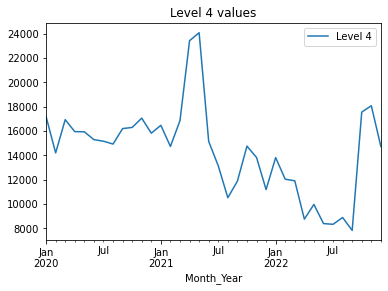


 Dickey Fuller test results:
ADF Test:
ADF Statistic : -2.5816007879226697
p-value : 0.09685994893840855
No. of Lags Used : 0
Number of Observations Used : 35
Failed to reject null hypothesis, data is non-stationary.

 Decompostion Plot


<Figure size 432x288 with 0 Axes>

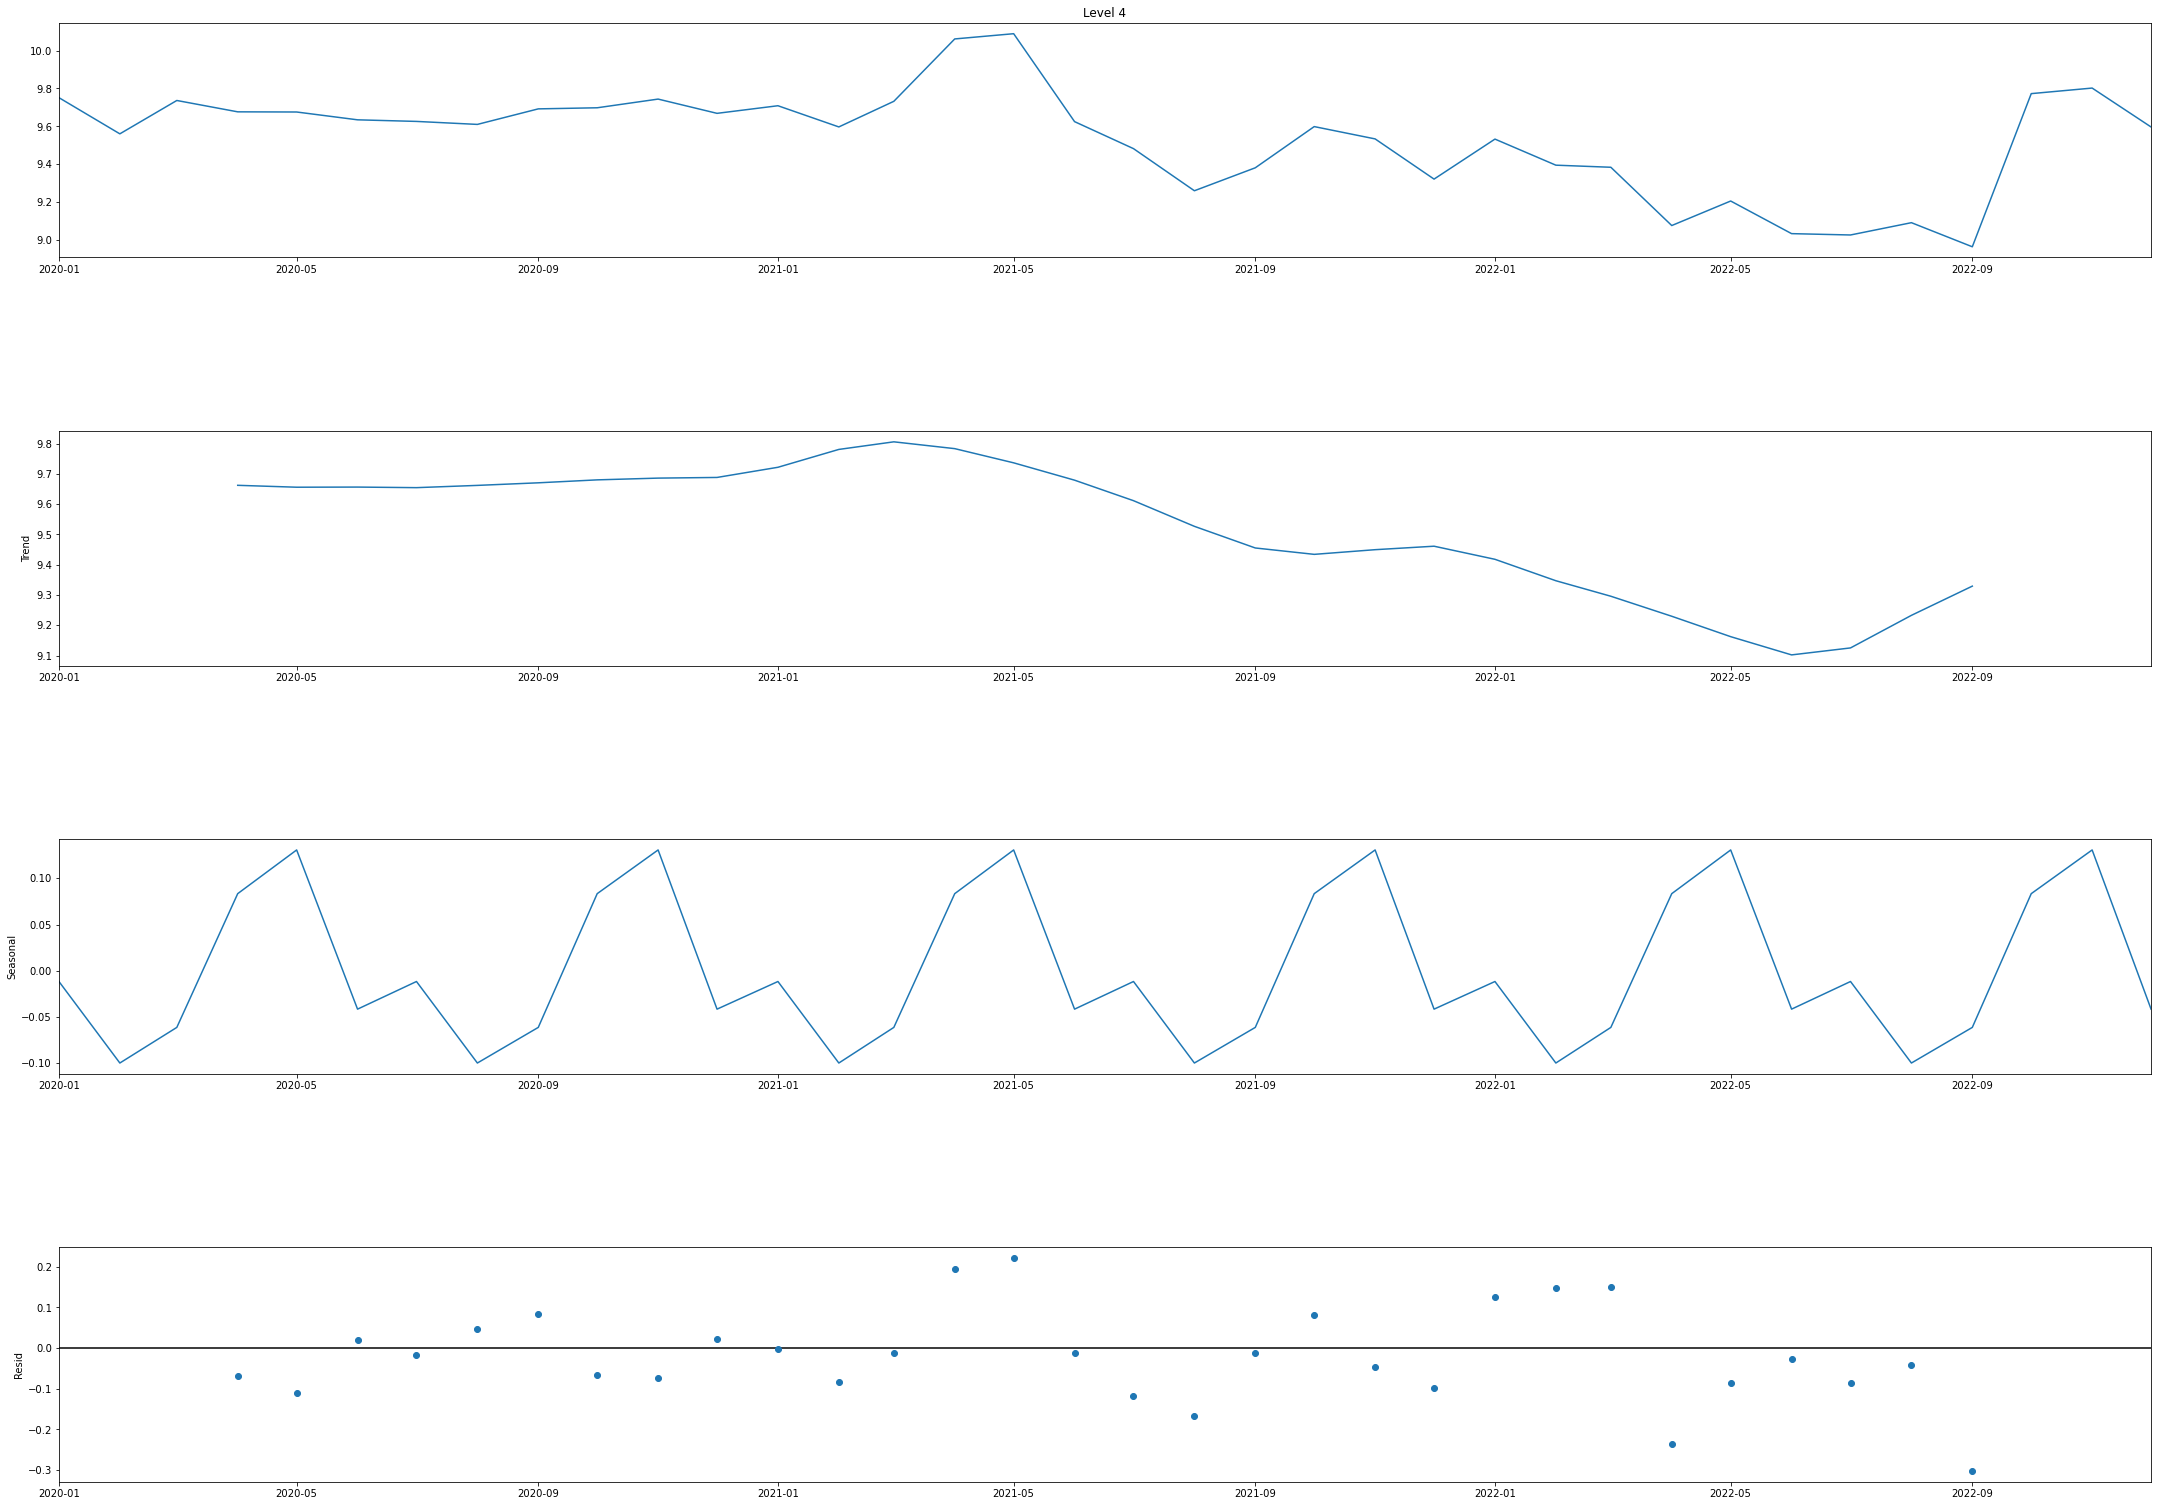

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=474.583, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=483.613, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=471.746, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=476.352, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=485.185, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=475.489, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=472.861, Time=0.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=473.386, Time=0.10 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=474.023, Time=0.30 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=485.541, Time=0.05 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=474.258, Time=0.10 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=474.443, Time=0.14 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=476.457, Time=0.11 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   

<Figure size 432x288 with 0 Axes>

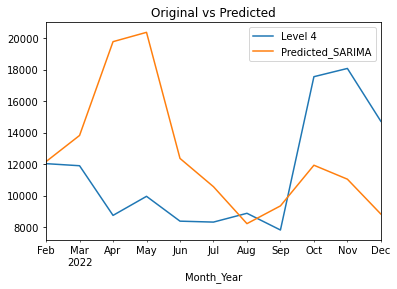

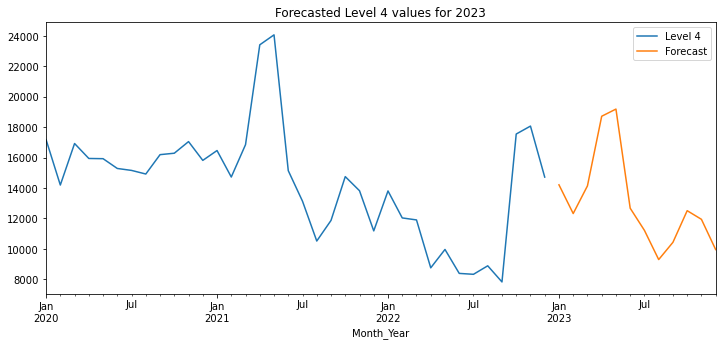

In [18]:
predict_future(dataframe,'Desktop_Website','Existing_Customer','LinkedIn','Bengaluru')

# Part 5: Visualization


## Please write a code to display :

### 1.A line graph for “Level 2” for the different “Place_in_India?” over the months of the year 2020 & 2021. (Hint: On x-axis, there should be months for 2020 & 2021 and Y axis should be “Level 2” and there should be different lines depicting different regions of  “Place_in_India?”)
### Plot a neat graph.

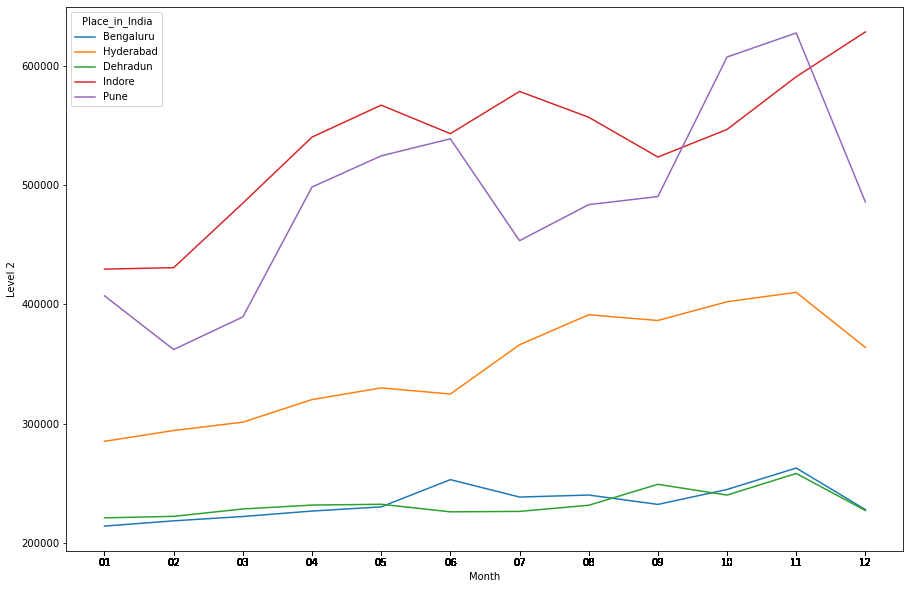

In [19]:
data=dataframe[(dataframe["Year"]==2021) | (dataframe["Year"] == 2022)]

plt.figure(figsize=(15,10))
a= sns.lineplot(data=data,x='Month',y='Level 2',hue='Place_in_India',ci=None)
a.set(xticks=data['Month'])
plt.show()
     

## 2. A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021.  (Hint : On x axis there should be months from jan- 2020 to dec- 2021 and Y axis should be the sum of “Level 1” and there should be different lines depicting different devices used.)

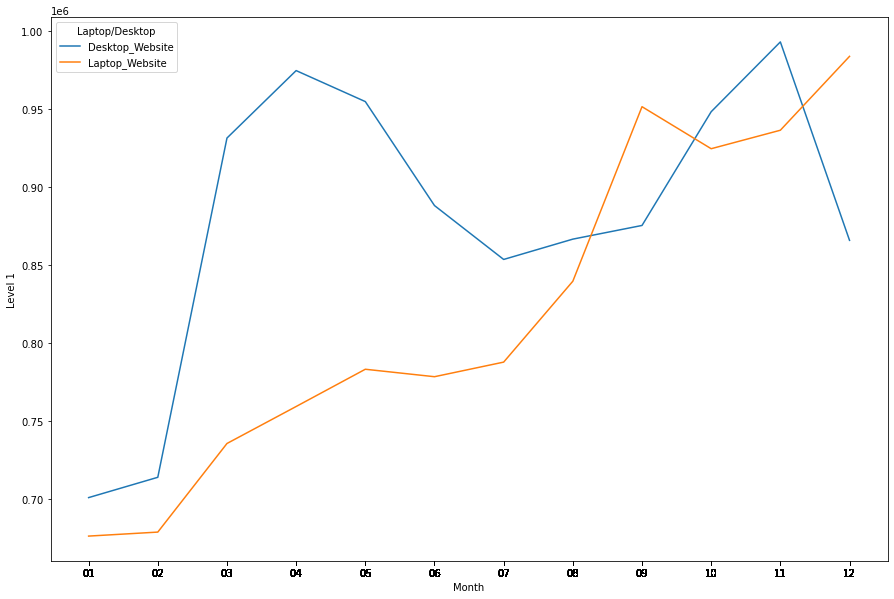

In [20]:
plt.figure(figsize=(15,10))
a=sns.lineplot(data=data,x='Month',y='Level 1',hue='Laptop/Desktop',ci=None)
a.set(xticks=data['Month'])
plt.show()

## 3. A line graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022.

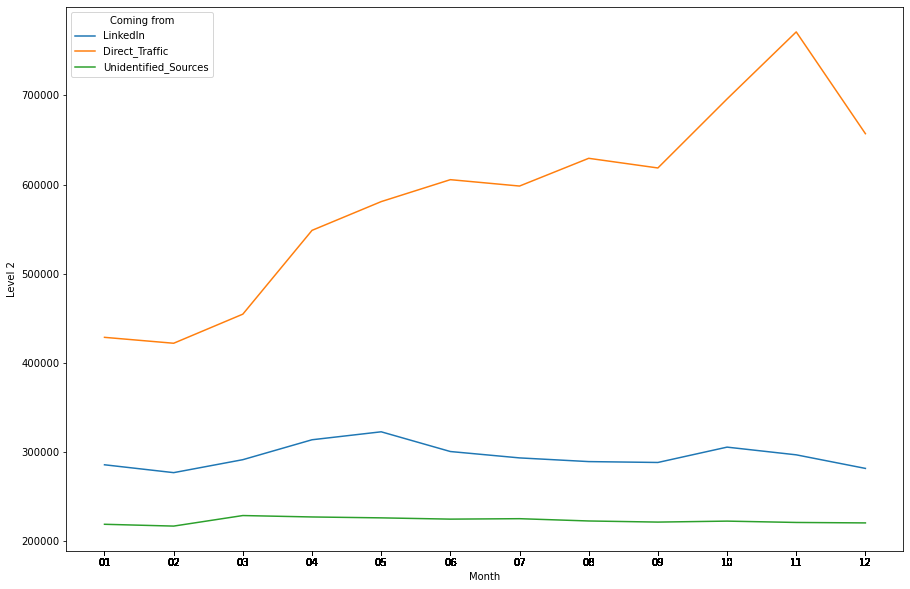

In [21]:
plt.figure(figsize=(15,10))
a= sns.lineplot(data=data,x='Month',y='Level 2',hue='Coming from',ci=None)
a.set(xticks=data['Month'])
plt.show()

## 4. A line graph for “Level 1” and “Level 2” over the months of the year 2020, 2021 & 2022.

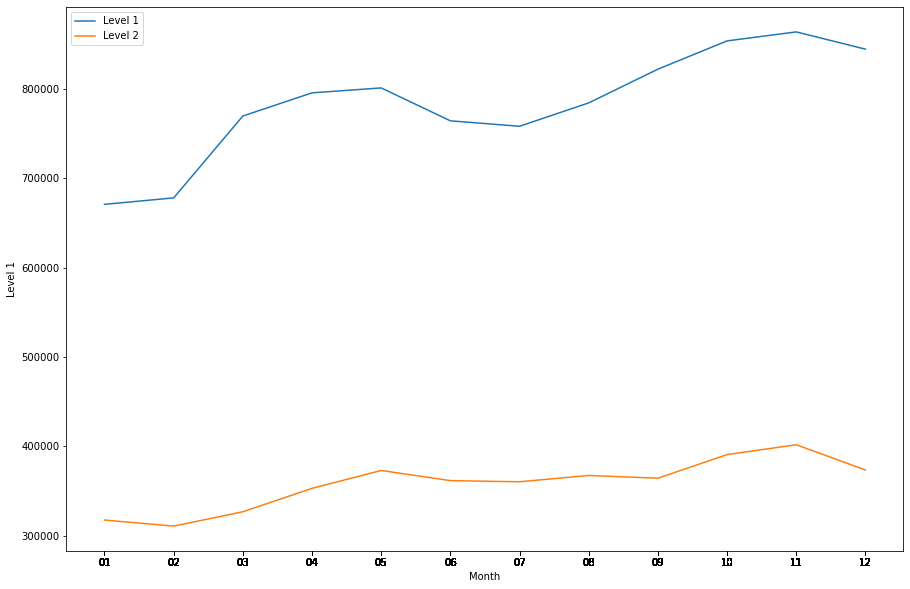

In [22]:
plt.figure(figsize=(15,10))
a= sns.lineplot(data=dataframe,x='Month',y='Level 1',label='Level 1',ci=None)
b=sns.lineplot(data=dataframe,x='Month',y='Level 2',label='Level 2',ci=None)
a.set(xticks=data['Month'])
plt.show()
     

## 5. A line graph for “Level 3” foyearslace_in_India” over the months of the year 2020 and 2021.

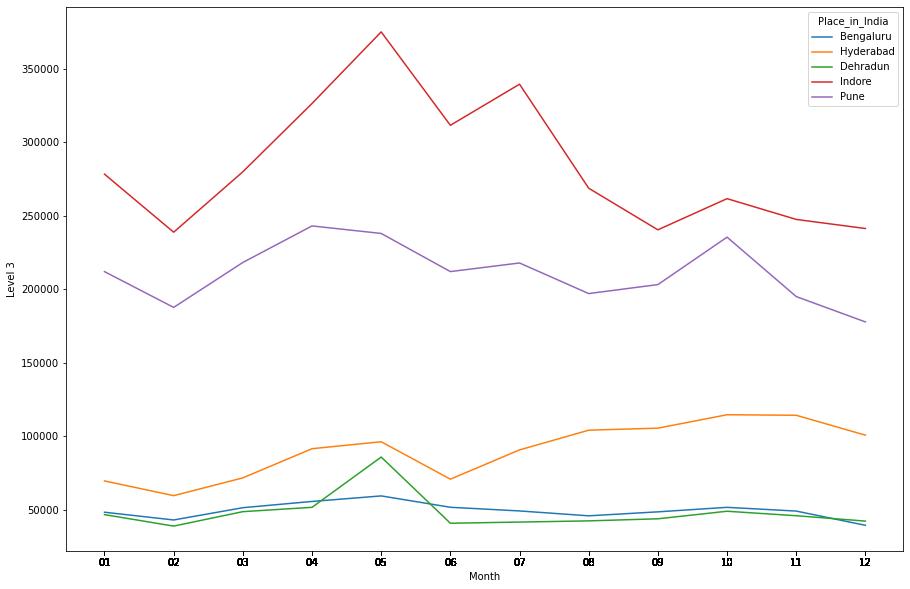

In [23]:
data2=dataframe[(dataframe["Year"]==2020) | (dataframe["Year"] == 2021)]

plt.figure(figsize=(15,10))
a= sns.lineplot(data=data2,x='Month',y='Level 3',hue='Place_in_India',ci=None)
a.set(xticks=data2['Month'])
plt.show()
     

## 6. Please add any insights you could derive from all the graphs above. 

Ans. Customers accessing the website/app from Indore have the highest Level 1 and Level 3 scores. In the months of April, May and November, the level 1 and Level 2 scores increase. Customers accessing the site directly have the highest level 2 score.